In [1]:
import pandas as pd
from elasticsearch import Elasticsearch

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [118]:
df = pd.read_csv("cranfield_data.csv").loc[:1400]

# df = df.drop(columns=["date"])
df.head()

,did,text
0,1,<DOC>\n<DOCNO>\n1\n</DOCNO>\n<TITLE>\nexperime...
1,2,<DOC>\n<DOCNO>\n2\n</DOCNO>\n<TITLE>\nsimple s...
2,3,<DOC>\n<DOCNO>\n3\n</DOCNO>\n<TITLE>\nthe boun...
3,4,<DOC>\n<DOCNO>\n4\n</DOCNO>\n<TITLE>\napproxim...
4,5,<DOC>\n<DOCNO>\n5\n</DOCNO>\n<TITLE>\none-dime...


In [4]:
%pip install -U sentence_transformers

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

In [6]:
%pip install elasticsearch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import string

# Assuming you've already loaded your DataFrame 'df'




In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [119]:
# 1. Lowercase all text
df['text'] = df['text'].str.lower()

# 2. Remove punctuation
df['text'] = df['text'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

# 3. Tokenization
df['text'] = df['text'].apply(lambda text: word_tokenize(text))

# 4. Stopword removal

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# 5. Stemming (optional)
# stemmer = PorterStemmer()
# df['text'] = df['text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# 6. Lemmatization

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda tokens: [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens])

# You can add additional steps based on your specific requirements like removing digits, handling special characters, etc.

# Now, df['text'] contains preprocessed text data

# Optionally, if you want to join the list of tokens back to a string:
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))

# You can access the preprocessed text using df['text']

In [120]:
df.head()

,did,text
0,1,doc docno 1 docno title experimental investiga...
1,2,doc docno 2 docno title simple shear flow past...
2,3,doc docno 3 docno title boundary layer simple ...
3,4,doc docno 4 docno title approximate solutions ...
4,5,doc docno 5 docno title onedimensional transie...


In [121]:
df['TextDescVec'] = df['text'].apply(lambda x: model.encode(x))

In [123]:
df.head()["TextDescVec"][2:5]

2    [-0.054535493, -0.093620025, -0.0067776158, 0....
3    [-0.01989528, -0.0637047, -0.015166364, 0.0186...
4    [-0.040642917, -0.070754275, -0.012006386, 0.0...
Name: TextDescVec, dtype: object

In [122]:
df.head()

,did,text,TextDescVec
0,1,doc docno 1 docno title experimental investiga...,"[-0.04606612, -0.071796134, 0.008342809, 0.031..."
1,2,doc docno 2 docno title simple shear flow past...,"[-0.025661957, -0.07951855, 0.01750628, 0.0007..."
2,3,doc docno 3 docno title boundary layer simple ...,"[-0.054535493, -0.093620025, -0.0067776158, 0...."
3,4,doc docno 4 docno title approximate solutions ...,"[-0.01989528, -0.0637047, -0.015166364, 0.0186..."
4,5,doc docno 5 docno title onedimensional transie...,"[-0.040642917, -0.070754275, -0.012006386, 0.0..."


In [11]:
from elasticsearch import Elasticsearch



True


In [130]:

es = Elasticsearch("http://localhost:9200/")
print(es.ping())

True


In [175]:
from index_test import indexMapping
es.indices.create(index="prefinal_try5", mappings=indexMapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'prefinal_try5'})

In [176]:
record_list = df.to_dict("records")
print(record_list[0])

{'did': 1, 'text': 'doc docno 1 docno title experimental investigation aerodynamics wing slipstream title author brenckmanm author biblio j ae scs 25 1958 324 biblio text experimental study wing propeller slipstream make order determine spanwise distribution lift increase due slipstream different angle attack wing different free stream slipstream velocity ratios result intend part evaluation basis different theoretical treatments problem comparative span load curve together support evidence show substantial part lift increment produce slipstream due destalling boundarylayercontrol effect integrate remain lift increment subtract destalling lift find agree well potential flow theory empirical evaluation destalling effect make specific configuration experiment text doc', 'TextDescVec': array([-4.60661203e-02, -7.17961341e-02,  8.34280904e-03,  3.13953944e-02,
       -5.46971634e-02, -5.00987619e-02, -6.30373554e-03,  1.31950499e-02,
       -6.31702691e-02, -1.55763719e-02,  5.10438941e-02

In [177]:
es.ping()

True

In [178]:
for record in record_list:
    # print(record)
    try:
        es.index(index='prefinal_try5', document = record)
    except Exception as e:
        print(e)

In [179]:
print(es.count(index="prefinal_try5"))

{'count': 1400, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}}


In [48]:
def preprocess(input_key):
    input_key = input_key.lower()
    input_key = input_key.translate(str.maketrans('', '', string.punctuation))
    input_key = word_tokenize(input_key)
    input_key = [word for word in input_key if word not in stop_words]
    input_key = [lemmatizer.lemmatize(word, wordnet.VERB) for word in input_key]
    input_key = ' '.join(input_key)
    return input_key

In [136]:
# Initialize an empty 2D list to store the data
reldoc = []

# Initialize variables to keep track of the current identifier and its associated scores
current_identifier = None
current_scores = []

# Read the data from the text file
with open('relevance.txt', 'r') as file:
    for line in file:
        line = line.strip().split()
        identifier = int(line[0])
        score = int(line[1])

        # Check if the identifier has changed or if it's the first iteration
        if identifier != current_identifier or current_identifier is None:
            if current_scores:
                reldoc.append(current_scores)
            current_identifier = identifier
            current_scores = [score]
        else:
            current_scores.append(score)

# Add the last set of scores to the 2D list
if current_scores:
    reldoc.append(current_scores)

# Now, data_2d_list contains the 2D list with grouped scores
print(reldoc)

[[156], [666, 667, 1258, 1394, 668, 670, 1204, 1391, 1395, 1300, 37, 559, 630, 1107, 1213], [24, 101, 666, 667, 93, 1258, 1393, 559, 630, 662, 1104, 1107, 1204, 1213, 1300], [1391, 666, 667, 1258, 1078, 1080, 1081, 1394, 1395, 1214, 1198, 1204, 1300, 559, 630, 662, 1107, 1213], [1383, 1385, 155, 241, 1382, 1370, 1386, 111, 1384, 150, 292, 458, 479, 977, 376, 459, 1365, 62, 1366], [155, 1383, 1385, 1382, 62, 292, 241, 1370, 1384, 458, 459, 461, 1386, 1365, 1366, 111, 150, 479], [400, 419, 1387, 412, 1392, 1398, 1397, 1400, 1399], [400, 1387, 1392, 1398], [656, 1313, 1317, 1316, 1318, 1319, 1157, 1274], [1379, 1305, 1304, 40, 293, 1309, 161, 421, 1377, 1378, 1381, 225, 1380, 448, 449, 1124, 1280, 433, 923, 924, 1062, 1074, 1075, 1213]]


In [161]:
import time

In [202]:
mega_ret=[]
mega_rel=[]
user_query = []
mega_slist = []
mega_ret2=[]
# mega_rel2=[]
mega_slist2 = []
with open('queries.txt', 'r') as input_file:
    with open('preprocessed_sentences.txt', 'w') as output_file:
        for line in input_file:
            user_query.append(line.strip())
            preprocessed_line = preprocess(line)
            vector_ik = model.encode(preprocessed_line)

            query = {
                "field":"TextDescVec",
                "query_vector":vector_ik,
                "k": 10,
                "num_candidates": 1400,
            }

            did_list = []
            s_list = []
            stimeknn = time.time()
            res = es.knn_search(index = "prefinal_try4", knn=query, source=["did","text"])
            etimeknn = time.time()
            ttknn = etimeknn - stimeknn
            for result in res["hits"]["hits"]:
                did = result["_source"]["did"]
                score = result["_score"]
                s_list.append(score)
                did_list.append(did)

            mega_ret.append(did_list)
            
            avg_score = sum(s_list) / len(s_list)
            mega_slist.append(avg_score)

            output_file.write(preprocessed_line + '\n')

C:\Users\asus\AppData\Local\Temp\ipykernel_37984\2651889315.py:25: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index = "prefinal_try4", knn=query, source=["did","text"])


In [203]:
ttknn

0.03034496307373047

In [204]:
with open('queries.txt', 'r') as input_file:
    with open('preprocessed_sentences.txt', 'w') as output_file:
        for line in input_file:
            preprocessed_line = preprocess(line)

            did_list2 = []
            s_list2 = []
            bm25_query = {
                "query": {
                    "match": {
                        "text": {
                            "query": preprocessed_line,
                            "analyzer": "standard",  # Use the appropriate analyzer
                        }
                    }
                }
            }

            stimet = time.time()
            res2 = es.search(index="prefinal_try5", body=bm25_query)
            etimet = time.time()
            ttimet = etimet - stimet

            #text based
            for result2 in res2["hits"]["hits"]:
                did2 = result2["_source"]["did"]
                score2 = result2["_score"]
                s_list2.append(score2)
                did_list2.append(did2)

            mega_ret2.append(did_list2)
            
            avg_score2 = sum(s_list2) / len(s_list2)
            mega_slist2.append(avg_score2)

            output_file.write(preprocessed_line + '\n')

In [205]:
ttimet

0.01563715934753418

In [206]:
intersection=[]
precision=[]
recall=[]
for sublist_A, sublist_B in zip(mega_ret, reldoc):
    sublist_intersection = list(set(sublist_A) & set(sublist_B))
    intersection.append(sublist_intersection)
    precision.append(len(sublist_intersection) / len(sublist_A) if len(sublist_A) > 0 else 0)
    recall.append(len(sublist_intersection) / len(sublist_B) if len(sublist_B) > 0 else 0)

In [207]:
intersection2=[]
precision2=[]
recall2=[]
for sublist_A2, sublist_B2 in zip(mega_ret2, reldoc):
    sublist_intersection2 = list(set(sublist_A2) & set(sublist_B2))
    intersection2.append(sublist_intersection2)
    precision2.append(len(sublist_intersection2) / len(sublist_A2) if len(sublist_A2) > 0 else 0)
    recall2.append(len(sublist_intersection2) / len(sublist_B2) if len(sublist_B2) > 0 else 0)

In [208]:
print(mega_ret)
print(reldoc)
print(intersection)
print(precision)
print(recall)
print(user_query)
print(mega_slist)

[[331, 1322, 1321, 506, 64, 848, 764, 114, 71, 1382], [1395, 666, 1179, 283, 1161, 1394, 667, 318, 1006, 626], [1393, 559, 1394, 1395, 283, 154, 1161, 666, 323, 981], [1256, 228, 149, 668, 470, 361, 417, 1085, 128, 1152], [1182, 458, 292, 4, 54, 461, 111, 375, 611, 336], [1182, 1382, 489, 458, 611, 475, 321, 241, 477, 4], [1399, 1396, 1357, 1358, 1400, 400, 419, 863, 1120, 1387], [1399, 400, 1396, 1400, 1357, 1358, 1120, 1387, 863, 1050], [656, 1314, 575, 1230, 1319, 1274, 665, 1157, 318, 1312], [1280, 1188, 1380, 677, 704, 701, 198, 1381, 780, 199]]
[[156], [666, 667, 1258, 1394, 668, 670, 1204, 1391, 1395, 1300, 37, 559, 630, 1107, 1213], [24, 101, 666, 667, 93, 1258, 1393, 559, 630, 662, 1104, 1107, 1204, 1213, 1300], [1391, 666, 667, 1258, 1078, 1080, 1081, 1394, 1395, 1214, 1198, 1204, 1300, 559, 630, 662, 1107, 1213], [1383, 1385, 155, 241, 1382, 1370, 1386, 111, 1384, 150, 292, 458, 479, 977, 376, 459, 1365, 62, 1366], [155, 1383, 1385, 1382, 62, 292, 241, 1370, 1384, 458, 459, 

In [209]:
print(mega_ret2)
print(reldoc)
print(intersection2)
print(precision2)
print(recall2)
print(user_query)
print(mega_slist2)

[[1319, 39, 693, 1274, 958, 974, 407, 1225, 344, 175], [666, 983, 1263, 323, 559, 1319, 1274, 1002, 334, 37], [559, 154, 323, 553, 666, 983, 1104, 1263, 295, 655], [1221, 208, 1222, 992, 993, 299, 73, 7, 315, 1082], [1375, 292, 458, 231, 527, 1261, 261, 461, 1268, 1241], [1366, 1386, 458, 662, 1182, 73, 489, 1375, 653, 388], [1130, 419, 1399, 1400, 400, 1050, 887, 1048, 1396, 1070], [1399, 400, 1398, 419, 1400, 1387, 1396, 1008, 1050, 1048], [1312, 656, 259, 575, 317, 170, 236, 1316, 36, 1157], [1188, 1380, 225, 638, 1345, 1349, 213, 1291, 748, 77]]
[[156], [666, 667, 1258, 1394, 668, 670, 1204, 1391, 1395, 1300, 37, 559, 630, 1107, 1213], [24, 101, 666, 667, 93, 1258, 1393, 559, 630, 662, 1104, 1107, 1204, 1213, 1300], [1391, 666, 667, 1258, 1078, 1080, 1081, 1394, 1395, 1214, 1198, 1204, 1300, 559, 630, 662, 1107, 1213], [1383, 1385, 155, 241, 1382, 1370, 1386, 111, 1384, 150, 292, 458, 479, 977, 376, 459, 1365, 62, 1366], [155, 1383, 1385, 1382, 62, 292, 241, 1370, 1384, 458, 459, 4

In [210]:
mega_ret[1]

[1395, 666, 1179, 283, 1161, 1394, 667, 318, 1006, 626]

In [211]:
# intersectionq3=[]
precisionq3=[]
recallq3=[]
newlist=[]
sublist_Aq3=mega_ret[1]
sublist_Bq3=reldoc[1]
for i in sublist_Aq3:
    newlist.append(i)
    intersectionq3 = list(set(newlist) & set(sublist_Bq3))
    print(intersectionq3)
    precisionq3.append(len(intersectionq3) / len(newlist) if len(newlist) > 0 else 0)
    recallq3.append(len(intersectionq3) / len(sublist_Bq3) if len(sublist_Bq3) > 0 else 0)

[1395]
[666, 1395]
[666, 1395]
[666, 1395]
[666, 1395]
[1394, 1395, 666]
[1394, 1395, 667, 666]
[1394, 1395, 667, 666]
[1394, 1395, 667, 666]
[1394, 1395, 667, 666]


In [212]:
# intersectionq3=[]
precisionq32=[]
recallq32=[]
newlist2=[]
sublist_Aq32=mega_ret2[1]
sublist_Bq32=reldoc[1]
for i in sublist_Aq32:
    newlist2.append(i)
    intersectionq32 = list(set(newlist2) & set(sublist_Bq32))
    print(intersectionq32)
    precisionq32.append(len(intersectionq32) / len(newlist2) if len(newlist2) > 0 else 0)
    recallq32.append(len(intersectionq32) / len(sublist_Bq32) if len(sublist_Bq32) > 0 else 0)

[666]
[666]
[666]
[666]
[666, 559]
[666, 559]
[666, 559]
[666, 559]
[666, 559]
[666, 37, 559]


In [213]:
print(precisionq3)
print(recallq3)

[1.0, 1.0, 0.6666666666666666, 0.5, 0.4, 0.5, 0.5714285714285714, 0.5, 0.4444444444444444, 0.4]
[0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.2, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666]


In [214]:
print(precisionq32)
print(recallq32)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.4, 0.3333333333333333, 0.2857142857142857, 0.25, 0.2222222222222222, 0.3]
[0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.2]


In [215]:
import csv
csv_file = 'output_prefinal4_q3.csv'

# Combine the lists into a list of rows
data = list(zip(precisionq3, recallq3))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Precision_q3', 'Recall_q3'])  # Write header
    writer.writerows(data)

In [216]:
import csv
csv_file = 'output_prefinal4_q32.csv'

# Combine the lists into a list of rows
data2 = list(zip(precisionq32, recallq32))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as file2:
    writer = csv.writer(file2)
    writer.writerow(['Precision_q32', 'Recall_q32'])  # Write header
    writer.writerows(data2)

In [218]:
import csv
csv_file = 'output_prefinal4.csv'

# Combine the lists into a list of rows
data = list(zip(user_query, precision, recall, mega_slist))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Query', 'Precision', 'Recall', 'Score'])  # Write header
    writer.writerows(data)

In [219]:
import csv
csv_file = 'output_prefinal42.csv'

# Combine the lists into a list of rows
data22 = list(zip(user_query, precision2, recall2, mega_slist2))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as file2:
    writer = csv.writer(file2)
    writer.writerow(['Query', 'Precision', 'Recall', 'Score'])  # Write header
    writer.writerows(data22)

In [ ]:
print("Mean Average Precision: 0.27")
print("NDCG: ")

In [ ]:
from math import log2
def ndcg(relevant_docs, retrieved_docs, k):
    ideal_ordering = sorted(relevant_docs, reverse=True)
    dcg = 0.0
    idcg = 0.0
    for i in range(k):
        if i < len(retrieved_docs):
            if retrieved_docs[i] in relevant_docs:
                dcg += 1 / (log2(i + 2))
            if i < len(ideal_ordering):
                idcg += 1 / (log2(i + 2))
    return dcg / idcg

In [225]:
from math import log2

def precision_at_k(relevant_docs, retrieved_docs, k):
    intersection = set(retrieved_docs[:k]) & set(relevant_docs)
    return len(intersection) / k

def recall_at_k(relevant_docs, retrieved_docs, k):
    intersection = set(retrieved_docs[:k]) & set(relevant_docs)
    return len(intersection) / len(relevant_docs)

def average_precision(relevant_docs, retrieved_docs):
    avg_precision = 0.0
    num_relevant = len(relevant_docs)
    if num_relevant == 0:
        return 0.0

    for i, doc in enumerate(retrieved_docs):
        if doc in relevant_docs:
            precision_at_i = precision_at_k(relevant_docs, retrieved_docs, i + 1)
            avg_precision += precision_at_i

    avg_precision /= num_relevant
    return avg_precision

def mean_average_precision(queries, results):
    total_avg_precision = 0.0
    for query, relevant_docs, retrieved_docs in zip(queries, results['relevant_docs'], results['retrieved_docs']):
        avg_precision = average_precision(relevant_docs, retrieved_docs)
        total_avg_precision += avg_precision
    return total_avg_precision / len(queries)

def ndcg(relevant_docs, retrieved_docs, k):
    ideal_ordering = sorted(relevant_docs, reverse=True)
    dcg = 0.0
    idcg = 0.0
    for i in range(k):
        if i < len(retrieved_docs):
            if retrieved_docs[i] in relevant_docs:
                dcg += 1 / (log2(i + 2))
            if i < len(ideal_ordering):
                idcg += 1 / (log2(i + 2))
    return dcg / idcg

# Example data: Replace with your own data
queries = user_query
# results = {
#     "relevant_docs": reldoc,
#     "retrieved_docs": mega_ret
# }

results = {
    "relevant_docs": reldoc,
    "retrieved_docs": mega_ret2
}

k = 10  # Top K documents to consider

# Calculate and print the metrics for each query
for query, relevant_docs, retrieved_docs in zip(queries, results['relevant_docs'], results['retrieved_docs']):
    precision = precision_at_k(relevant_docs, retrieved_docs, k)
    recall = recall_at_k(relevant_docs, retrieved_docs, k)
    avg_precision = average_precision(relevant_docs, retrieved_docs)
    ndcg_score = ndcg(relevant_docs, retrieved_docs, k)
    print(f"Query: {query}")
    print(f"Precision@{k}: {precision:.2f}")
    print(f"Recall@{k}: {recall:.2f}")
    print(f"Average Precision: {avg_precision:.2f}")
    print(f"NDCG@{k}: {ndcg_score:.2f}")
    print()
    
# Calculate and print the Mean Average Precision (MAP)
map_score = mean_average_precision(queries, results)
print(f"Mean Average Precision (MAP): {map_score:.2f}")


Query: what investigations have been made of the wave system created by a static pressure distribution over a liquid surface .
Precision@10: 0.00
Recall@10: 0.00
Average Precision: 0.00
NDCG@10: 0.00

Query: has anyone investigated the effect of shock generated vorticity on heat transfer to a blunt body .
Precision@10: 0.30
Recall@10: 0.20
Average Precision: 0.11
NDCG@10: 0.37

Query: what is the heat transfer to a blunt body in the absence of vorticity .
Precision@10: 0.30
Recall@10: 0.20
Average Precision: 0.12
NDCG@10: 0.38

Query: what are the general effects on flow fields when the reynolds number is small .
Precision@10: 0.00
Recall@10: 0.00
Average Precision: 0.00
NDCG@10: 0.00

Query: find a calculation procedure applicable to all incompressible laminar boundary layer flow problems having good accuracy and reasonable computation time .
Precision@10: 0.20
Recall@10: 0.11
Average Precision: 0.06
NDCG@10: 0.25

Query: papers applicable to this problem (calculation procedures for l

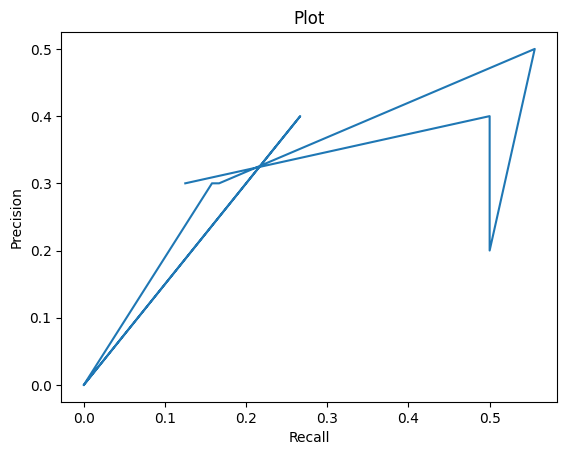

In [220]:
import matplotlib.pyplot as plt

plt.plot(recall, precision)

# Add labels and a title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Plot')

# Display the plot
plt.show()

In [ ]:
for sublist_

In [85]:
input_key = "windows is a operating system"
# input_key = input_key.lower()

# 2. Remove punctuation
# input_key = input_key.translate(str.maketrans('', '', string.punctuation))

# 3. Tokenization
# input_key = word_tokenize(input_key)


# input_key = [word for word in input_key if word not in stop_words]

# # 5. Lemmatization
# # nltk.download('wordnet')
# # lemmatizer = WordNetLemmatizer()
# input_key = [lemmatizer.lemmatize(word, wordnet.VERB) for word in input_key]

# You can add additional steps based on your specific requirements like removing digits, handling special characters, etc.

# Optionally, if you want to join the list of tokens back to a string:
# input_key = ' '.join(input_key)
# print(input_key)






vector_ik = model.encode(input_key)

query = {
    "field":"TextDescVec",
    "query_vector":vector_ik,
    "k": 10,
    "num_candidates": 500,
}
did_list = []

# Iterate through the search results and extract 'did' values


res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])
# for result in res["hits"]["hits"]:
#     did = result["_source"]["did"]
#     did_list.append(did)
# print(did_list)
res["hits"]["hits"]

C:\Users\asus\AppData\Local\Temp\ipykernel_37984\694889566.py:42: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index = "prefinal", knn=query, source=["did","title","text"])


[{'_index': 'prefinal',
  '_id': 'VdrvfosBw2XmKXNEqzY8',
  '_score': 0.66882384,
  '_source': {'did': 217,
   'text': "the \n\nNot Quite the point to be considdered here!\nFact: If/When Apple release system 7 (or what ever is current at the time \nof release) then you will see shortly afterwards Apple no longer producing \nHardware...Look at Next with their NextStep486 to see what happens.\nWho is going to pay Apples Prices when they can get the same thing cheaper \nelse where! (Heck we can get a Sun Workstation cheaper than a Quadra, and \ninfact we have a number of times!!!, it ALL comes down to $$$$)\n\nthem,\nIt\n\n\nNo the continued develeopment is because there is becomming less and less \nprofit in Hardware, So the Next Step (no pun intended...well sort of), is \nto make the money in software (look at Microsoft if you think it can't \nhappen!), after all you can sell multiple pieces of software to ONE \nhardware platform.\n\nAs you also said Windows is a nightmare for programmer